# Import Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the data

In [75]:
data = pd.read_csv('Blend.csv')

# EDA

In [76]:
#printing the head
data.head()

,AF,AV,AC,SR,CL,FSO,TSO,D,PH,S,OH,Target,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


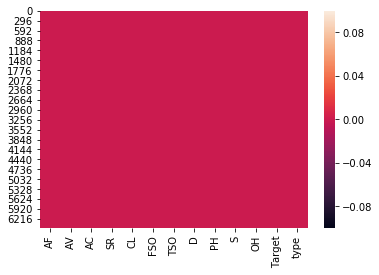

In [77]:
#checking whether there is any NA's present in the dataset
sns.heatmap(data.isnull())

#convert to factors
data['type'] = data['type'].astype('category')

#convert to factors
data['Target'] = data['Target'].astype('category')

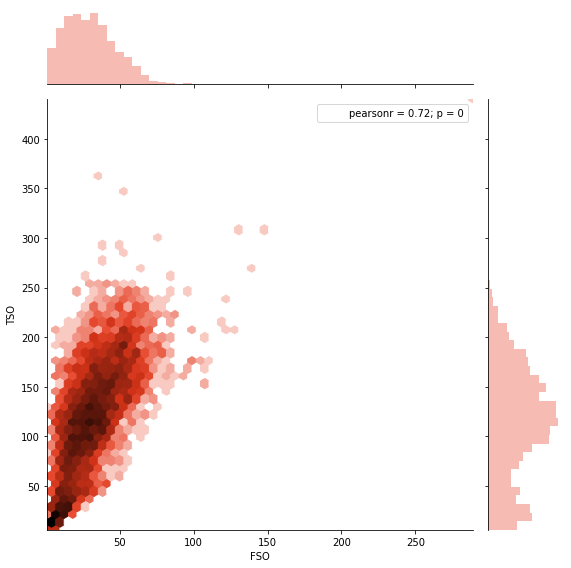

In [78]:
#plot showing FSO v/s TSO where 
sns.jointplot(data=data,x='FSO',y='TSO',kind="hexagon",color='#E9573F',size = 8,joint_kws={'gridsize':50, 'bins':'log'})

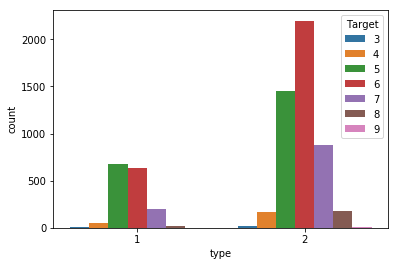

In [79]:
sns.countplot(data=data,x='type',hue='Target')

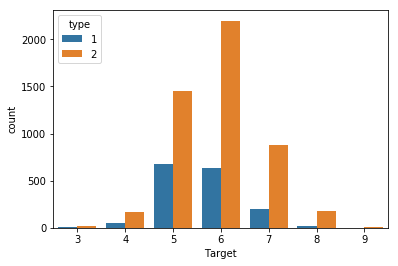

In [80]:
sns.countplot(data=data,x='Target',hue='type')

# Data Preparation

In [88]:
#storing the target into a new variable
target=data['type']
dummy_type = data['Target']

In [89]:
#creating dummies and dropping
target = pd.get_dummies(target)
target.columns = ['type1','type2']
dummy_type = pd.get_dummies(dummy_type)
dummy_type.columns = ['target3','target4','target5','target6','target7','target8','target9']

In [90]:
data = pd.concat((data,dummy_type),axis=1)

In [91]:
data.head()

,AF,AV,AC,SR,CL,FSO,TSO,D,PH,S,...,target7,target8,target9,target3,target4,target5,target6,target7,target8,target9
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0,0,0,0,0,1,0,0,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0,0,0,0,0,1,0,0,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0,0,0,0,0,1,0,0,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0,0,0,0,0,0,1,0,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0,0,0,0,0,1,0,0,0,0


In [92]:
target.head()

,type1,type2
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [93]:
#final dataframe preparation
data_final = data.drop(['Target','type','target9'], axis = 1)

#final target preparation
target = target.drop(['type2'], axis=1)

# Model Building

In [68]:
#train test split
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(data_final,target, test_size=0.30, random_state=42)

# Train the Support Vector Classifier

In [95]:
from sklearn.svm import SVC

In [96]:
model = SVC()

In [97]:
model.fit(X_train,y_train)

C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Predictions and Evaluations

In [99]:
predictions = model.predict(X_test)

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
conf_matrix = confusion_matrix(y_test,predictions)

In [102]:
print(conf_matrix)

[[1426   22]
 [  93  409]]


In [103]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.98      0.96      1448
          1       0.95      0.81      0.88       502

avg / total       0.94      0.94      0.94      1950



# Grid Search

In [107]:
param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [104]:
from sklearn.model_selection import GridSearchCV

In [108]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [109]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.758575197889182, total=   4.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.758575197889182, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.5s remaining:    0.0s
C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.759075907590759, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8364116094986808, total=   2.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8324538258575198, total=   3.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8455445544554455, total=   3.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9360158311345647, total=   0.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9393139841688655, total=   0.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9306930693069307, total=   0.9s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.9346965699208444, total=   0.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.9399736147757256, total=   0.4s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.9293729372937294, total=   0.4s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.933377308707124, total=   0.5s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.9353562005277045, total=   0.5s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=0.1, gamma=0.0001, kernel=rbf, score=0.9287128712871288, total=   0.5s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, score=0.7935356200527705, total=   3.9s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, score=0.8027704485488126, total=   4.0s
[CV] C=1, gamma=1, kernel=rbf ........................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=1, kernel=rbf, score=0.7980198019801981, total=   3.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9373350923482849, total=   3.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9472295514511874, total=   3.1s
[CV] C=1, gamma=0.1, kernel=rbf ......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9346534653465347, total=   3.1s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9432717678100264, total=   0.7s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9485488126649076, total=   0.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9419141914191419, total=   0.7s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9439313984168866, total=   0.4s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9445910290237467, total=   0.4s
[CV] C=1, gamma=0.001, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9379537953795379, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.9379947229551451, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.941952506596306, total=   0.4s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.933993399339934, total=   0.4s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, score=0.8007915567282322, total=   4.0s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, score=0.8100263852242744, total=   3.9s
[CV] C=10, gamma=1, kernel=rbf .......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=1, kernel=rbf, score=0.8046204620462046, total=   3.9s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9426121372031663, total=   3.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9551451187335093, total=   3.1s
[CV] C=10, gamma=0.1, kernel=rbf .....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9432343234323433, total=   3.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9571240105540897, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9650395778364116, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9577557755775578, total=   0.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9505277044854882, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9584432717678101, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9524752475247524, total=   0.3s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.945910290237467, total=   0.3s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9531662269129287, total=   0.4s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, gamma=0.0001, kernel=rbf, score=0.9445544554455445, total=   0.3s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=rbf, score=0.8007915567282322, total=   4.1s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=rbf, score=0.8100263852242744, total=   3.9s
[CV] C=100, gamma=1, kernel=rbf ......................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=1, kernel=rbf, score=0.8046204620462046, total=   4.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9426121372031663, total=   3.2s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9564643799472295, total=   3.3s
[CV] C=100, gamma=0.1, kernel=rbf ....................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9432343234323433, total=   3.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9610817941952506, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9736147757255936, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.01, kernel=rbf, score=0.9617161716171617, total=   0.6s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9802110817941952, total=   0.5s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9835092348284961, total=   0.4s
[CV] C=100, gamma=0.001, kernel=rbf ..................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.001, kernel=rbf, score=0.9801980198019802, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9558047493403694, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9630606860158312, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................


C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9603960396039604, total=   0.3s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.7min finished
C:\Users\Mudit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [110]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [111]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
grid_predictions = grid.predict(X_test)

In [113]:
print(confusion_matrix(y_test,grid_predictions))

[[1431   17]
 [  23  479]]


In [114]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1448
          1       0.97      0.95      0.96       502

avg / total       0.98      0.98      0.98      1950

